# Loan defaulter prediction

### This problem is mainly applied to banking industries. This model will help in identifying the individuals who will be loan defaulter

In [184]:
import warnings
warnings.filterwarnings('ignore')
import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, ConfusionMatrixDisplay
from scikitplot.metrics import plot_cumulative_gain as pcg
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [2]:
df = pd.read_csv('Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
df.shape

(148670, 34)

In [4]:
df.isna().sum()/ len(df) * 100

ID                            0.000000
year                          0.000000
loan_limit                    2.249277
Gender                        0.000000
approv_in_adv                 0.610749
loan_type                     0.000000
loan_purpose                  0.090133
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.509989
Interest_rate_spread         24.644515
Upfront_charges              26.664425
term                          0.027578
Neg_ammortization             0.081388
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.155378
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.154571
credit_type                   0.000000
Credit_Score             

In [5]:
imputer = SimpleImputer()
df[['rate_of_interest', 'term','property_value','income','dtir1']] = imputer.fit_transform(df[['rate_of_interest', 'term','property_value','income','dtir1']])

In [6]:
imputer = SimpleImputer(strategy='most_frequent')
df[['age']] = imputer.fit_transform(df[['age']])

In [7]:
df.isna().sum() /len(df) * 100

ID                            0.000000
year                          0.000000
loan_limit                    2.249277
Gender                        0.000000
approv_in_adv                 0.610749
loan_type                     0.000000
loan_purpose                  0.090133
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest              0.000000
Interest_rate_spread         24.644515
Upfront_charges              26.664425
term                          0.000000
Neg_ammortization             0.081388
interest_only                 0.000000
lump_sum_payment              0.000000
property_value                0.000000
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        0.000000
credit_type                   0.000000
Credit_Score             

In [8]:
df.dropna(subset = ['loan_limit', 'submission_of_application', 'Neg_ammortization', 'loan_purpose', 'approv_in_adv', 'loan_limit'], inplace = True)

In [9]:
df.isna().sum() /len(df) * 100

ID                            0.000000
year                          0.000000
loan_limit                    0.000000
Gender                        0.000000
approv_in_adv                 0.000000
loan_type                     0.000000
loan_purpose                  0.000000
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest              0.000000
Interest_rate_spread         24.495947
Upfront_charges              26.617031
term                          0.000000
Neg_ammortization             0.000000
interest_only                 0.000000
lump_sum_payment              0.000000
property_value                0.000000
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        0.000000
credit_type                   0.000000
Credit_Score             

In [10]:
df['Interest_rate_spread'].dtypes

dtype('float64')

In [11]:
df['Upfront_charges'].dtypes

dtype('float64')

In [12]:
df['LTV'].dtypes

dtype('float64')

In [13]:
imputer = SimpleImputer()
df[['Interest_rate_spread', 'Upfront_charges','LTV']] = imputer.fit_transform(df[['Interest_rate_spread', 'Upfront_charges','LTV']])

In [14]:
df.isna().sum() /len(df) * 100

ID                           0.0
year                         0.0
loan_limit                   0.0
Gender                       0.0
approv_in_adv                0.0
loan_type                    0.0
loan_purpose                 0.0
Credit_Worthiness            0.0
open_credit                  0.0
business_or_commercial       0.0
loan_amount                  0.0
rate_of_interest             0.0
Interest_rate_spread         0.0
Upfront_charges              0.0
term                         0.0
Neg_ammortization            0.0
interest_only                0.0
lump_sum_payment             0.0
property_value               0.0
construction_type            0.0
occupancy_type               0.0
Secured_by                   0.0
total_units                  0.0
income                       0.0
credit_type                  0.0
Credit_Score                 0.0
co-applicant_credit_type     0.0
age                          0.0
submission_of_application    0.0
LTV                          0.0
Region    

In [15]:
df.corr()


,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
ID,1.000000,NaN,-0.000459,0.000374,1.712950e-03,-5.104658e-03,-0.003875,0.000117,0.001782,-0.000513,-0.005109,1.483663e-03,-0.007356
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,-0.000459,NaN,1.000000,-0.125892,-3.116122e-01,5.328963e-02,0.174697,0.687115,0.444679,0.004683,0.036172,-3.468597e-02,0.013245
rate_of_interest,0.000374,NaN,-0.125892,1.000000,6.158019e-01,-7.190507e-02,0.181875,-0.108450,-0.031514,-0.000701,0.000132,5.005380e-03,0.044022
Interest_rate_spread,0.001713,NaN,-0.311612,0.615802,1.000000e+00,3.362408e-02,-0.137713,-0.291717,-0.113040,-0.001726,0.038231,2.862834e-17,0.060244
Upfront_charges,-0.005105,NaN,0.053290,-0.071905,3.362408e-02,1.000000e+00,-0.047390,0.043657,0.013986,-0.000904,-0.029234,-6.493458e-18,-0.001073
term,-0.003875,NaN,0.174697,0.181875,-1.377130e-01,-4.738997e-02,1.000000,0.041777,-0.053660,-0.002534,0.100571,-6.955944e-04,0.104434
property_value,0.000117,NaN,0.687115,-0.108450,-2.917170e-01,4.365695e-02,0.041777,1.000000,0.387337,0.002718,-0.212828,-3.775969e-02,-0.055895
income,0.001782,NaN,0.444679,-0.031514,-1.130399e-01,1.398615e-02,-0.053660,0.387337,1.000000,0.001482,-0.028495,-6.338341e-02,-0.253187
Credit_Score,-0.000513,NaN,0.004683,-0.000701,-1.725519e-03,-9.036562e-04,-0.002534,0.002718,0.001482,1.000000,-0.005527,3.173072e-03,-0.000184


In [16]:
df.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

In [17]:
numerical_col = df.select_dtypes(include = np.number).columns.tolist()

In [18]:
df = pd.get_dummies(df, columns=['loan_type','age', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'Region', 'Security_Type'], drop_first=True)

In [19]:
x = df.drop('Status', axis = 1)
y = df['Status']

In [20]:
etr_model = ExtraTreesRegressor()
etr_model.fit(x,y)
etr_model.feature_importances_

array([7.42484003e-07, 0.00000000e+00, 9.10795082e-05, 2.52931499e-01,
       2.02954687e-01, 1.34862743e-01, 2.98823407e-04, 1.27555387e-05,
       1.30357859e-04, 3.30629724e-07, 5.38062125e-04, 6.20542146e-03,
       5.63576791e-03, 1.62345555e-03, 1.21689925e-06, 2.25307438e-07,
       5.78013543e-07, 3.53603887e-06, 1.64985370e-06, 0.00000000e+00,
       1.52783698e-04, 1.93627469e-05, 0.00000000e+00, 4.86775328e-08,
       1.40450901e-04, 1.02289205e-04, 1.01098866e-04, 4.27464261e-04,
       4.57307387e-03, 1.09400034e-04, 6.79121494e-03, 1.00225697e-02,
       1.63003562e-04, 1.83843012e-02, 1.66118622e-06, 6.12590428e-04,
       2.09333547e-04, 0.00000000e+00, 7.91917406e-06, 3.12926997e-07,
       0.00000000e+00, 8.30512936e-07, 3.47993198e-01, 1.79640729e-06,
       9.06677657e-05, 4.79762765e-03, 3.68427256e-07, 3.17318954e-07,
       1.25170799e-07, 3.25819219e-06])

<Axes: >

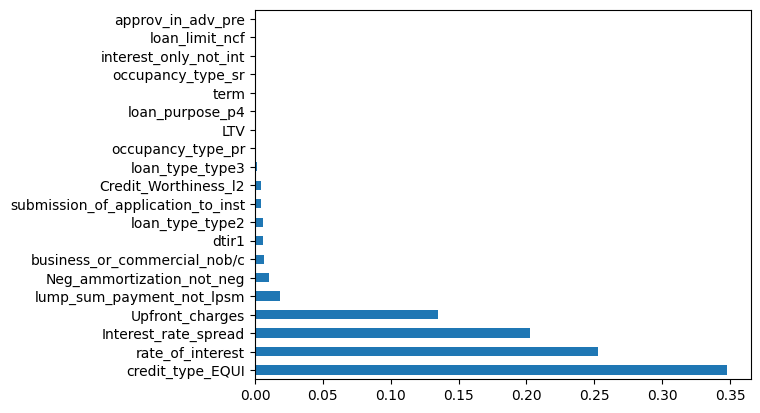

In [21]:
feature_imp = pd.Series(etr_model.feature_importances_,index=x.columns)
feature_imp.nlargest(20).plot(kind='barh')

In [23]:
x1 = df[['credit_type_EQUI', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'lump_sum_payment_not_lpsm', 'Neg_ammortization_not_neg', 'business_or_commercial_nob/c']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=.3, random_state = 42, stratify = y)

In [25]:
y_train.value_counts()/ len(y_train) * 100

0    75.504028
1    24.495972
Name: Status, dtype: float64

In [26]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [27]:
y_train.value_counts()

0    76099
1    76099
Name: Status, dtype: int64

In [28]:
y_train.value_counts()/ len(y_train) * 100

0    50.0
1    50.0
Name: Status, dtype: float64

In [29]:
mms = MinMaxScaler()

In [30]:
X_train = pd.DataFrame(mms.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(mms.transform(X_test),columns = X_test.columns)

# LOGISTIC REGRESSION

In [31]:
LR = LogisticRegression()

In [32]:
LR.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred_LR = LR.predict(X_test)

In [34]:
conf_matr = confusion_matrix(y_test, y_pred_LR)
conf_matr

array([[29942,  2672],
       [ 4675,  5906]])

In [35]:
roc=roc_auc_score(y_test, y_pred_LR)
acc = accuracy_score(y_test, y_pred_LR)
prec = precision_score(y_test, y_pred_LR)
rec = recall_score(y_test, y_pred_LR)
f1 = f1_score(y_test, y_pred_LR)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.829911,0.688505,0.55817,0.616525,0.738121


In [36]:
specificity_LR = conf_matr[0][0] / (conf_matr[0][0] + conf_matr[0][1])
specificity_LR

0.9180719936223708

In [37]:
LR_train_accuracy = LR.score(X_train, y_train)
LR_train_accuracy

0.7398060421293315

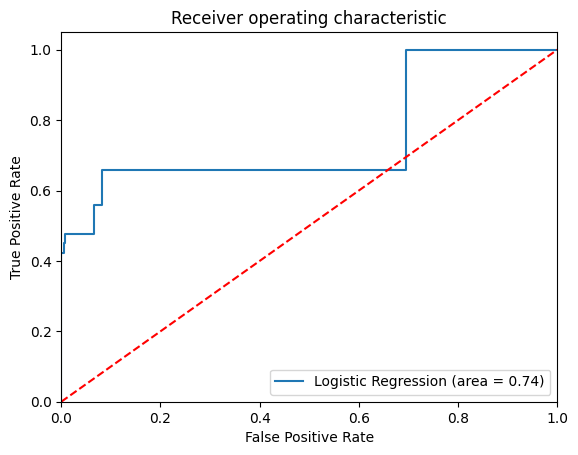

In [38]:
logit_roc_auc=roc_auc_score(y_test,LR.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

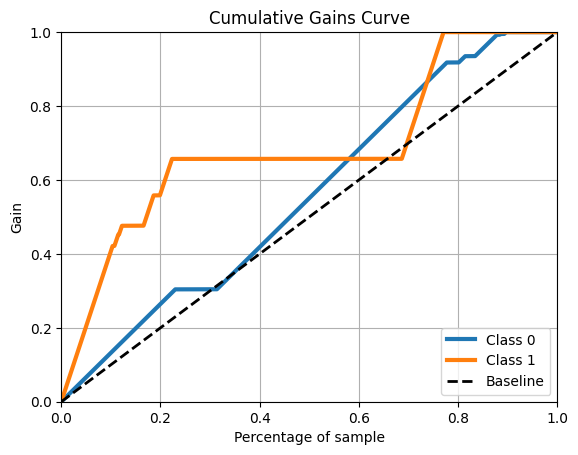

In [39]:
probs = LR.predict_proba(X_test)

pcg(y_test, probs)
plt.show()

# DECISION TREE

In [47]:
DT = DecisionTreeClassifier(max_depth = 1)

In [48]:
DT_train = DT.fit(X_train, y_train)

In [49]:
y_pred_DT = DT.predict(X_test)

In [50]:
conf_matr_DT = confusion_matrix(y_test, y_pred_DT)
conf_matr_DT

array([[19141, 13473],
       [    0, 10581]])

In [51]:
roc=roc_auc_score(y_test, y_pred_DT)
acc = accuracy_score(y_test, y_pred_DT)
prec = precision_score(y_test, y_pred_DT)
rec = recall_score(y_test, y_pred_DT)
f1 = f1_score(y_test, y_pred_DT)

results = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree,0.688089,0.439885,1.0,0.611,0.793448


In [53]:
specificity_DT = conf_matr_DT[0][0] / (conf_matr_DT[0][0] + conf_matr_DT[0][1])
specificity_DT

0.5868951983810633

In [54]:
DT_train_accuracy = DT.score(X_train, y_train)
DT_train_accuracy

0.792132616722953

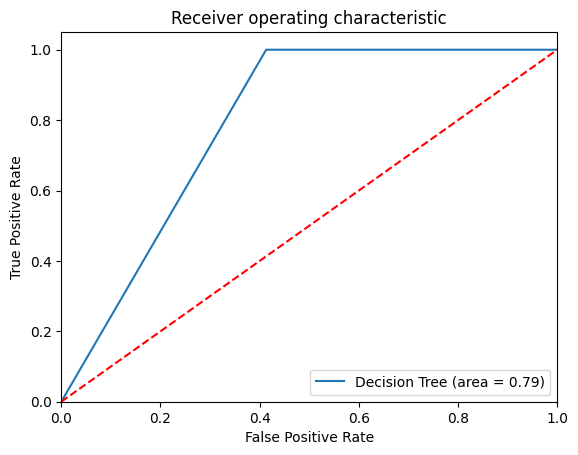

In [55]:
dt_roc_auc=roc_auc_score(y_test,DT.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,DT.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

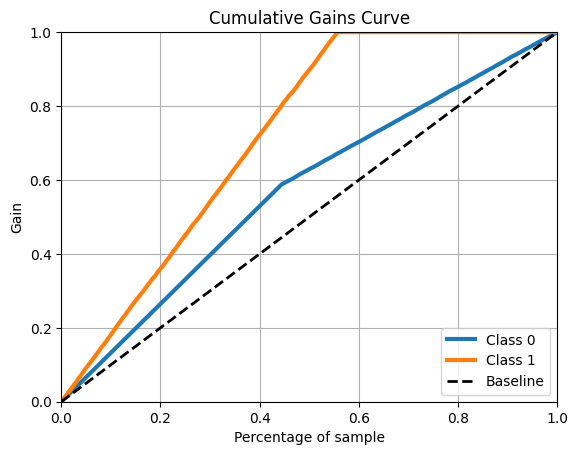

In [56]:
probs1 = DT.predict_proba(X_test)

pcg(y_test, probs1)
plt.show()

# KNN

In [57]:
error = []

In [58]:
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred_KNN = knn.predict(X_test)
    error.append(math.sqrt(mean_squared_error(y_test, y_pred_KNN)))

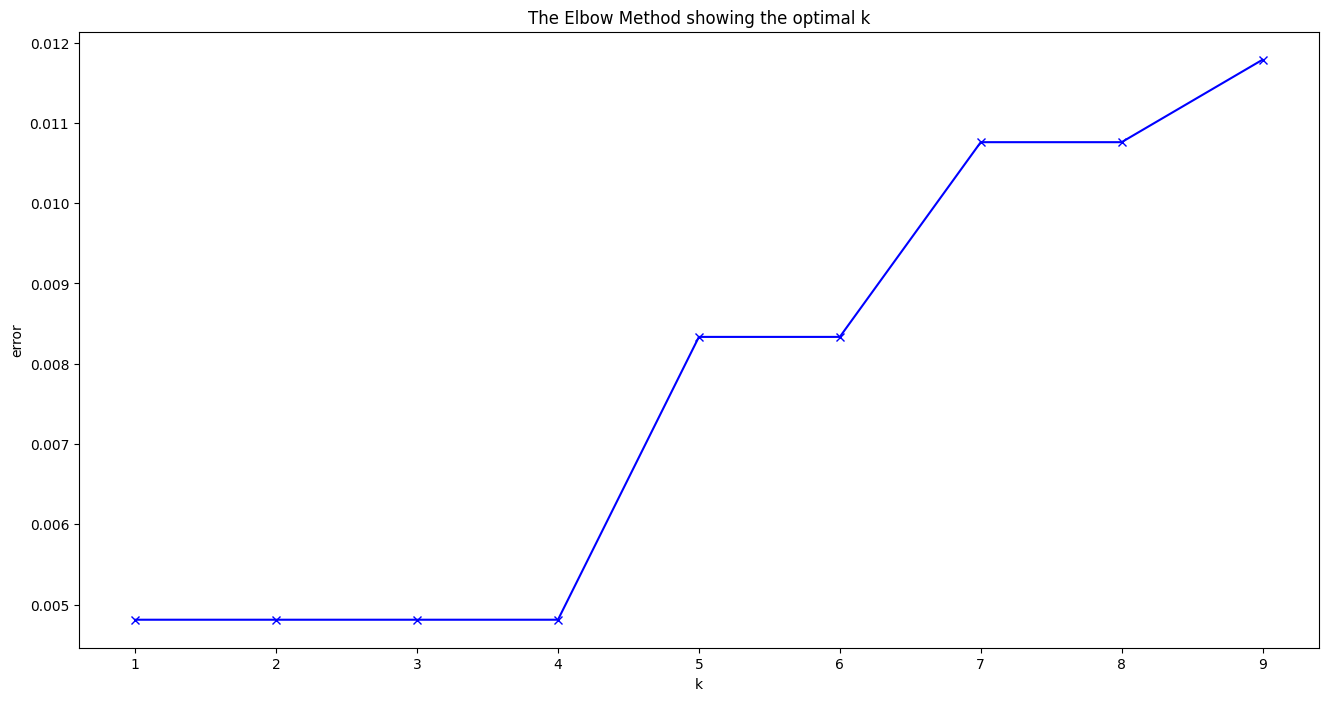

In [59]:
plt.figure(figsize=(16,8))
plt.plot(range(1, 10), error, 'bx-')
plt.xlabel('k')
plt.ylabel('error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [60]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred_KNN = knn.predict(X_test)

In [61]:
conf_matr_K = confusion_matrix(y_test, y_pred_KNN)
conf_matr_K

array([[32613,     1],
       [    0, 10581]])

In [62]:
roc=roc_auc_score(y_test, y_pred_KNN)
acc = accuracy_score(y_test, y_pred_KNN)
prec = precision_score(y_test, y_pred_KNN)
rec = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)

results = pd.DataFrame([['KNN', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN,0.999977,0.999905,1.0,0.999953,0.999985


In [63]:
specificity_KNN = conf_matr_K[0][0] / (conf_matr_K[0][0] + conf_matr_K[0][1])
specificity_KNN

0.9999693383209665

In [64]:
KNN_train_accuracy = knn.score(X_train, y_train)
KNN_train_accuracy

0.9999802888342817

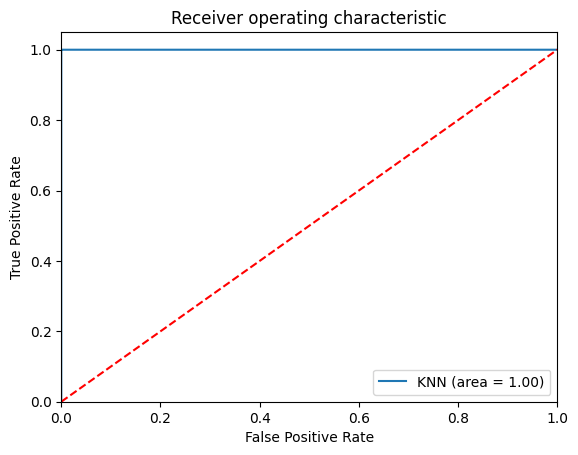

In [65]:
knn_roc_auc=roc_auc_score(y_test,knn.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [66]:
probs2 = knn.predict_proba(X_test)

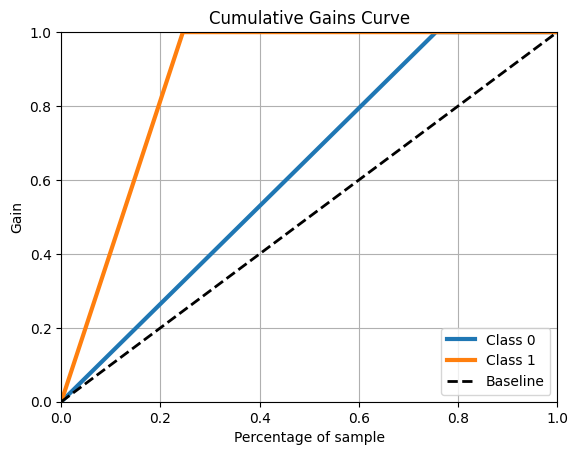

In [67]:
pcg(y_test, probs2)
plt.show()

# Decision Tree Hypertuning

In [68]:
## Using Randomsearch cv
def random_search(model,X_train,Y_train,param_grid):
    from sklearn.model_selection import RandomizedSearchCV
    random = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=4,random_state=42,n_jobs=-1,error_score='raise') 
    random.fit(X_train,Y_train)
    print(random.best_params_)

In [69]:
# create DecisionTreeClassifier parameters dict for tuning
DTR_para_grid = {
            "splitter":["best","random"],
            "max_depth" : list(range(1,32)),
           "min_samples_leaf":np.linspace(0.1, 0.5, 9, endpoint=True),
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           }
random_search(DecisionTreeClassifier(),X_train,y_train,param_grid=DTR_para_grid)

{'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.25, 'max_features': None, 'max_depth': 18}


In [70]:
DT_tune = DecisionTreeClassifier(**{'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.25, 'max_features': None, 'max_depth': 18})

In [71]:
DT_tune.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=18, min_samples_leaf=0.25,
                       min_weight_fraction_leaf=0.1)

In [72]:
y_pred_DT_tune = DT_tune.predict(X_test)

In [73]:
conf_matr_DT_tune = confusion_matrix(y_test, y_pred_DT_tune)
conf_matr_DT_tune

array([[19141, 13473],
       [    0, 10581]])

In [74]:
roc=roc_auc_score(y_test, y_pred_DT_tune)
acc = accuracy_score(y_test, y_pred_DT_tune)
prec = precision_score(y_test, y_pred_DT_tune)
rec = recall_score(y_test, y_pred_DT_tune)
f1 = f1_score(y_test, y_pred_DT_tune)

results = pd.DataFrame([['Decision Tree after tuning', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree after tuning,0.688089,0.439885,1.0,0.611,0.793448


In [75]:
train_accuracy_tunes = DT_tune.score(X_train, y_train)
train_accuracy_tunes

0.792132616722953

In [76]:
probs3 = DT_tune.predict_proba(X_test)

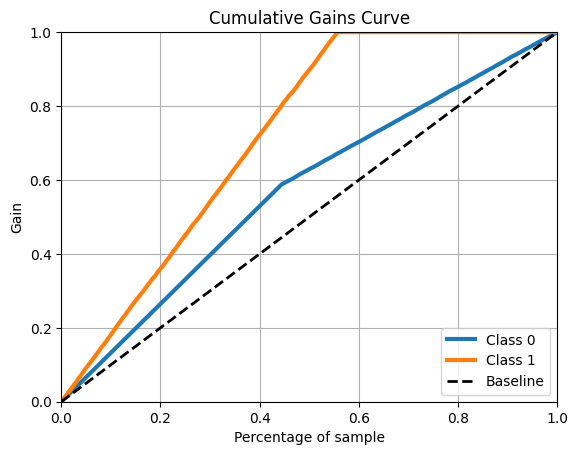

In [77]:
pcg(y_test, probs3)
plt.show()

In [78]:
specificity_DT_tuned = conf_matr_DT_tune[0][0] / (conf_matr_DT_tune[0][0] + conf_matr_DT_tune[0][1])
specificity_DT_tuned

0.5868951983810633

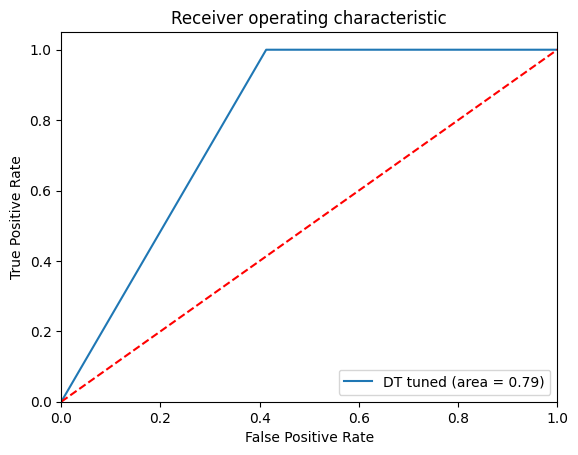

In [82]:
dt1_roc_auc=roc_auc_score(y_test,DT_tune.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,DT_tune.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='DT tuned (area = %0.2f)' % dt1_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Random Forest Classifier

In [121]:
RF = RandomForestClassifier()

In [122]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [123]:
y_pred_RF = RF.predict(X_test)

In [124]:
conf_matr_RF = confusion_matrix(y_test, y_pred_RF)
conf_matr_RF

array([[32614,     0],
       [    0, 10581]])

In [125]:
roc=roc_auc_score(y_test, y_pred_RF)
acc = accuracy_score(y_test, y_pred_RF)
prec = precision_score(y_test, y_pred_RF)
rec = recall_score(y_test, y_pred_RF)
f1 = f1_score(y_test, y_pred_RF)

results = pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,1.0,1.0,1.0,1.0,1.0


In [126]:
specificity_RF = conf_matr_RF[0][0] / (conf_matr_RF[0][0] + conf_matr_RF[0][1])
specificity_RF

1.0

In [127]:
train_accuracy_RF = RF.score(X_train, y_train)
train_accuracy_RF

1.0

In [128]:
probs4 = RF.predict_proba(X_test)

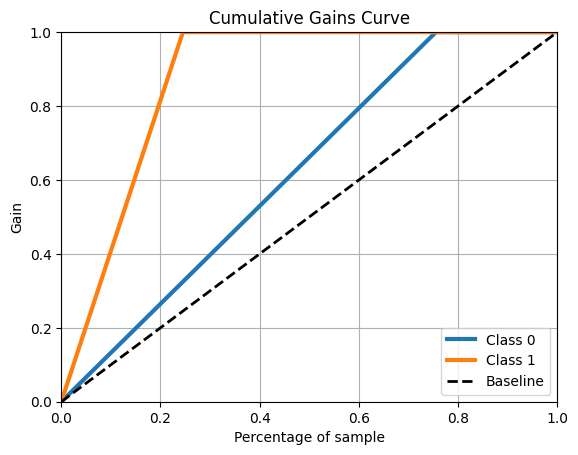

In [129]:
pcg(y_test, probs4)
plt.show()

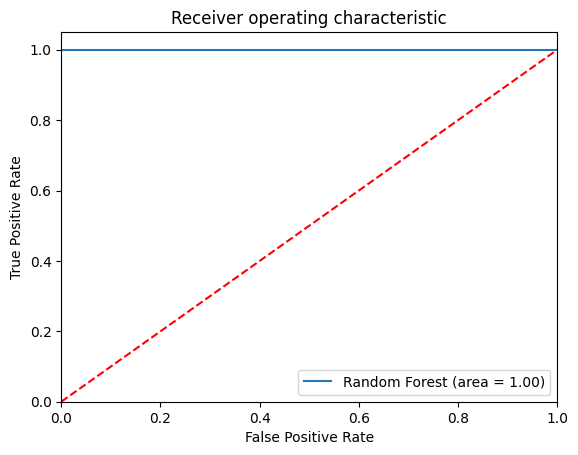

In [130]:
rf_roc_auc=roc_auc_score(y_test,RF.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,RF.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# CV Score - Decision Tree

In [180]:
DT = DecisionTreeClassifier(**{'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.25, 'max_features': None})
score_DT = cross_val_score(DT, x1, y, cv=3)
print(score_DT)
print(np.mean(score_DT))

[0.96130847 0.96134934 0.96222444]
0.9616274165626978


In [181]:
y_pred_DT = cross_val_predict(DT, x1, y, cv = 3)
conf_mat_DT = confusion_matrix(y, y_pred_DT)
print(conf_mat_DT)

[[103188   5525]
 [     0  35270]]


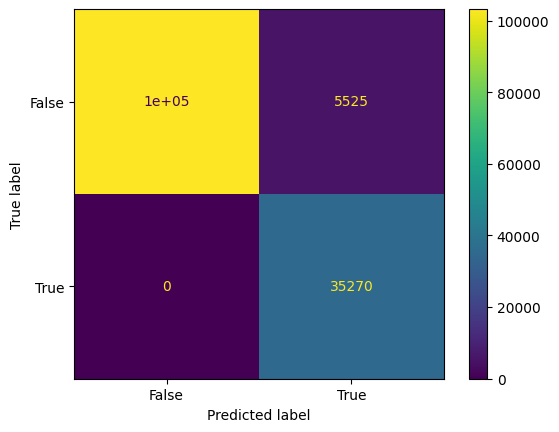

In [186]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat_DT, display_labels = [False, True])

cm_display.plot()
plt.show()

In [189]:
precision = conf_mat_DT[1][1]/ (conf_mat_DT[1][1] + conf_mat_DT[0][1])
recall = conf_mat_DT[1][1]/ (conf_mat_DT[1][1] + conf_mat_DT[1][0])
f1 = (2*precision*recall)/ (precision +recall)
specificity = conf_matr_DT[0][0] / (conf_matr_DT[0][0] + conf_matr_DT[0][1])

print(precision)
print(recall)
print(f1)
print(specificity)

0.8645667361196225
1.0
0.9273647538289621
0.5868951983810633


# CV score in Logistic Regression

In [190]:
LR = LogisticRegression()
score_LR = cross_val_score(LR, x1, y, cv=3)
print(score_LR)
print(np.mean(score_LR))

[0.86404834 0.86017002 0.86192024]
0.8620461998837469


In [191]:
y_pred_LR = cross_val_predict(LR, x1, y, cv = 3)
conf_mat_LR = confusion_matrix(y, y_pred_LR)
print(conf_mat_LR)

[[108397    316]
 [ 19547  15723]]


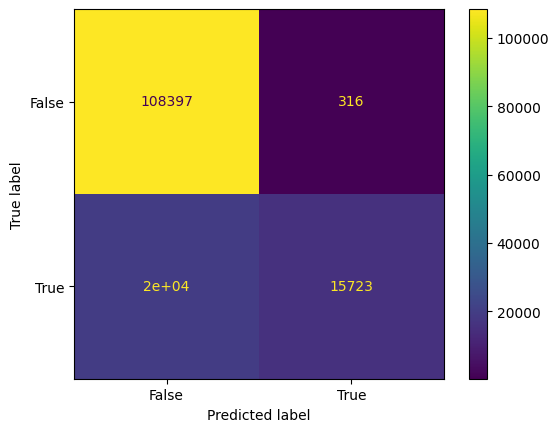

In [192]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat_LR, display_labels = [False, True])

cm_display.plot()
plt.show()

In [193]:
precision = conf_mat_LR[1][1]/ (conf_mat_LR[1][1] + conf_mat_LR[0][1])
recall = conf_mat_LR[1][1]/ (conf_mat_LR[1][1] + conf_mat_LR[1][0])
f1 = (2*precision*recall)/ (precision +recall)
specificity = conf_mat_LR[0][0] / (conf_mat_LR[0][0] + conf_mat_LR[0][1])

print(precision)
print(recall)
print(f1)
print(specificity)

0.9802980235675541
0.4457896229089878
0.6128749342220664
0.9970932639150791


# CV score in Random Forest

In [194]:
RF = RandomForestClassifier()
score_RF = cross_val_score(RF, x1, y, cv=3)
print(score_RF)
print(np.mean(score_RF))

[1. 1. 1.]
1.0


In [195]:
y_pred_RF = cross_val_predict(RF, x1, y, cv = 3)
conf_mat_RF = confusion_matrix(y, y_pred_RF)
print(conf_mat_RF)

[[108713      0]
 [     0  35270]]


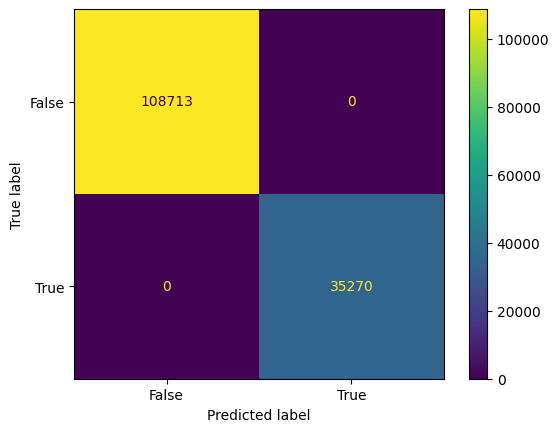

In [196]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat_RF, display_labels = [False, True])

cm_display.plot()
plt.show()

In [197]:
precision = conf_mat_RF[1][1]/ (conf_mat_RF[1][1] + conf_mat_RF[0][1])
recall = conf_mat_RF[1][1]/ (conf_mat_RF[1][1] + conf_mat_RF[1][0])
f1 = (2*precision*recall)/ (precision +recall)
specificity = conf_mat_RF[0][0] / (conf_mat_RF[0][0] + conf_mat_RF[0][1])

print(precision)
print(recall)
print(f1)
print(specificity)

1.0
1.0
1.0
1.0
